Nama    : Cetta Maulana Andhika<br>
Nim     : 1103213119<br>
Judul   : Tugas_9, NN, [housingpricedata.csv](https://www.kaggle.com/datasets/moewie94/housepricedata)<br>
Chatgpt : [Link](https://chatgpt.com/share/ac9823b2-c525-4086-9180-c1d4d18f206c)<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



2024-06-06 15:57:28.428760: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 15:57:30.098858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("/home/cetta/tugas_14/dataset/housepricedata.csv")
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
X = data.drop(columns=["AboveMedianPrice"])
y = data["AboveMedianPrice"]

print(X.shape)
print(y.shape)



(1460, 10)
(1460,)


In [4]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential([
    Dense(32,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

2024-06-06 15:57:33.366270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-06 15:57:33.414450: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-06 15:57:33.414588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-06 15:57:33.420490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-06 15:57:33.420666: I tensorflow/compile

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=100, callbacks=[early_stopping])


Epoch 1/100


2024-06-06 15:57:40.154140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-06-06 15:57:40.168679: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f165e803960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-06 15:57:40.168758: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-06-06 15:57:40.182519: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-06 15:57:40.929235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-06-06 15:57:41.174049: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifeti

16/16 [==============================] - 7s 35ms/step - loss: 0.3908 - accuracy: 0.8425 - val_loss: 0.1790 - val_accuracy: 0.9315
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 0.2664 - accuracy: 0.8845 - val_loss: 0.1796 - val_accuracy: 0.9132
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 0.2388 - accuracy: 0.9031 - val_loss: 0.1791 - val_accuracy: 0.9361
Epoch 4/100
16/16 [==============================] - 0s 17ms/step - loss: 0.2354 - accuracy: 0.9002 - val_loss: 0.1839 - val_accuracy: 0.9132
Epoch 5/100
16/16 [==============================] - 0s 17ms/step - loss: 0.2247 - accuracy: 0.9012 - val_loss: 0.1921 - val_accuracy: 0.9178
Epoch 6/100
16/16 [==============================] - 0s 18ms/step - loss: 0.2140 - accuracy: 0.9012 - val_loss: 0.1846 - val_accuracy: 0.9224
Epoch 7/100
16/16 [==============================] - 0s 17ms/step - loss: 0.2073 - accuracy: 0.9110 - val_loss: 0.1887 - val_accuracy: 0.9361
Epoch 8/100
16/16 

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 0s 8ms/step - loss: 0.1932 - accuracy: 0.9361
Test Loss: 0.19322849810123444
Test Accuracy: 0.9360730648040771


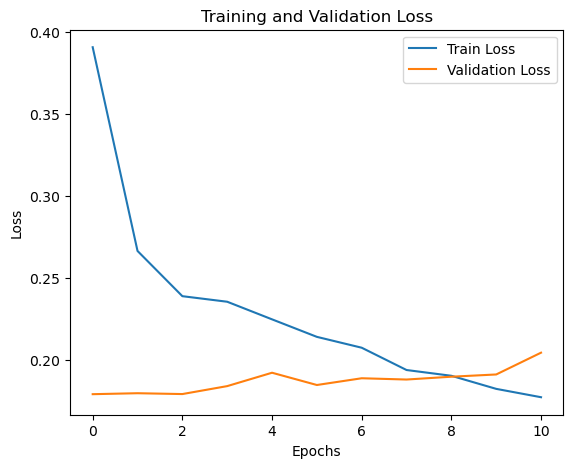

In [7]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.show()

7/7 [==============================] - 0s 4ms/step


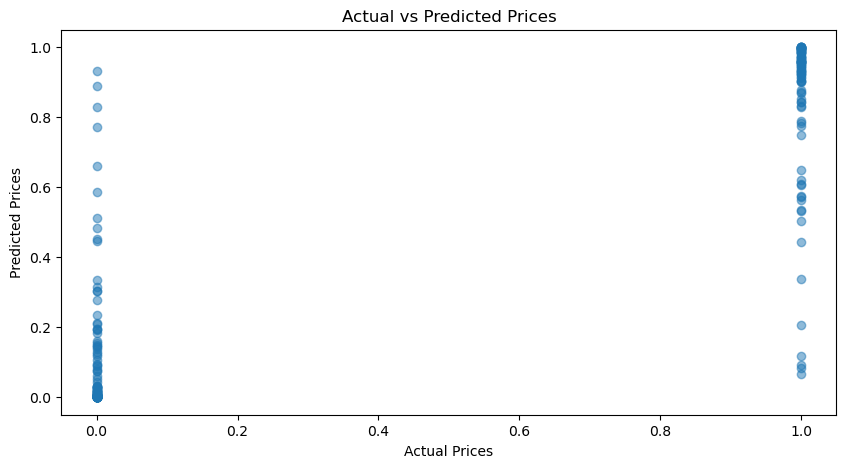

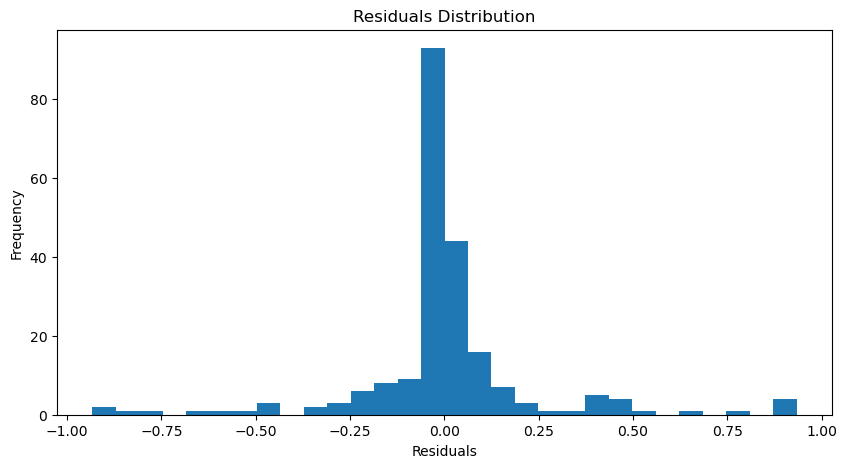

In [8]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()